# Calculation of the Probability distribution function

The donors were assumed to be at 50nm below the micromagnet. The magnetic field is calculated in a 200nm x 200nm region between the two micromagnets.

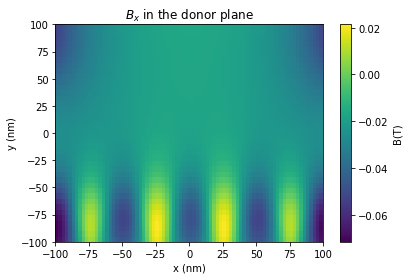

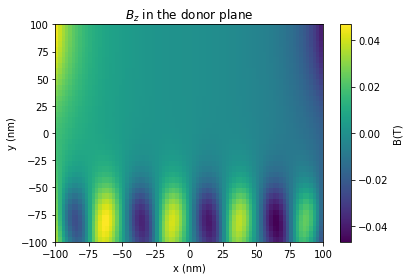

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = 'repeat_slant_plane.dat'
bxData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/Bx_"+dataset)
byData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/By_"+dataset)
bzData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/Bz_"+dataset)

x = np.linspace(-100,100,bxData.shape[1])
y = np.linspace(-100,100,bxData.shape[0])
XX,YY = np.meshgrid(x,y)

plt.figure(1)
plt.pcolor(XX,YY,bxData)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
cbar = plt.colorbar()
cbar.set_label("B(T)")
plt.title(r"$B_x$ in the donor plane")

plt.figure(2)
plt.pcolor(XX,YY,bzData)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
cbar = plt.colorbar()
cbar.set_label("B(T)")
plt.title(r"$B_z$ in the donor plane")

(201, 201)


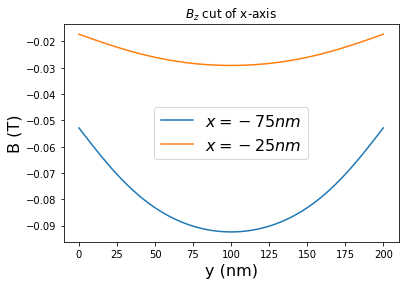

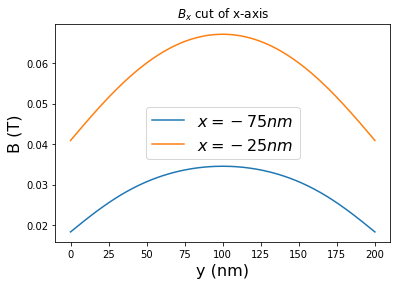

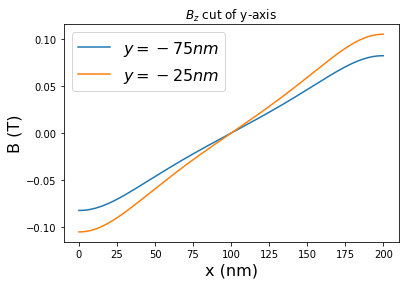

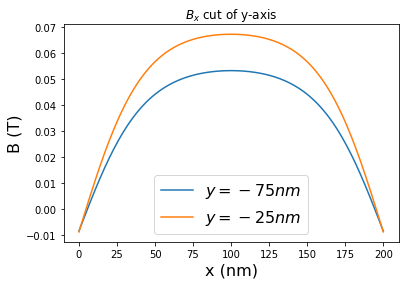

In [20]:
# line plots
print(bzData.shape)
plt.figure(1)
plt.plot(bzData[:,25],label=r"$x = -75nm$")
plt.plot(bzData[:,75],label=r"$x = -25nm$")
plt.xlabel("y (nm)",fontsize=16)
plt.ylabel("B (T)",fontsize=16)
plt.title(r"$B_z$ cut of x-axis")
plt.legend(fontsize=16)

plt.figure(2)
plt.plot(bxData[:,25],label=r"$x = -75nm$")
plt.plot(bxData[:,75],label=r"$x = -25nm$")
plt.xlabel("y (nm)",fontsize=16)
plt.ylabel("B (T)",fontsize=16)
plt.title(r"$B_x$ cut of x-axis")
plt.legend(fontsize=16)

plt.figure(3)
plt.plot(bzData[25,:],label=r"$y = -75nm$")
plt.plot(bzData[75,:],label=r"$y = -25nm$")
plt.xlabel("x (nm)",fontsize=16)
plt.ylabel("B (T)",fontsize=16)
plt.title(r"$B_z$ cut of y-axis")
plt.legend(fontsize=16)

plt.figure(4)
plt.plot(bxData[25,:],label=r"$y = -75nm$")
plt.plot(bxData[75,:],label=r"$y = -25nm$")
plt.xlabel("x (nm)",fontsize=16)
plt.ylabel("B (T)",fontsize=16)
plt.title(r"$B_x$ cut of y-axis")
plt.legend(fontsize=16)

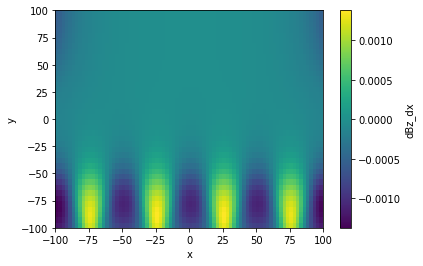

In [5]:
bz_gradient = np.gradient(bzData,10)
plt.pcolor(XX,YY,bz_gradient[1])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="dBz_dx")

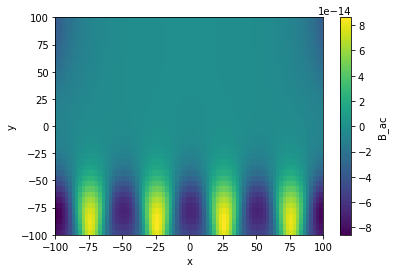

In [22]:
l_orb = 2.5e-9 
Delta = 10e-3 #eV
E_ac = 0.1e6 #V/m

conv_factor = l_orb**2*E_ac/Delta 
B_ac = conv_factor * bz_gradient[1]

plt.pcolor(XX,YY,B_ac)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="B_ac")



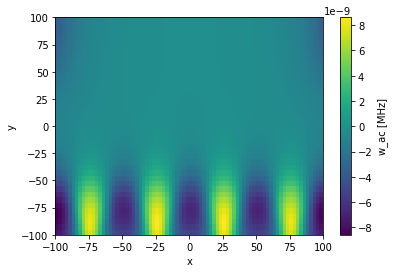

In [8]:
g_mu_b_h = 1e11
w_ac = g_mu_b_h * B_ac 

plt.pcolor(XX,YY,w_ac/1e6)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_ac [MHz]")

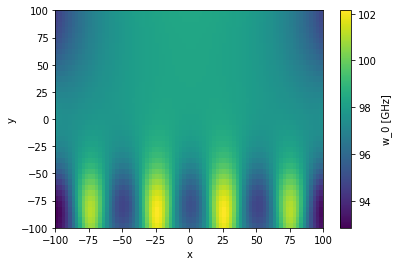

In [9]:
B_ext = 1
B_net = B_ext + bxData
w_0 = g_mu_b_h * B_net

plt.pcolor(XX,YY,w_0/1e9)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_0 [GHz]")

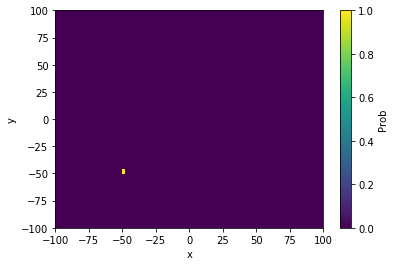

In [25]:
center = 20
x_0 = center  
y_0 = 10

P = w_ac*w_ac/(w_ac*w_ac + (w_0[y_0,x_0] - w_0)**2)
plt.pcolor(XX,YY,P)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Prob")


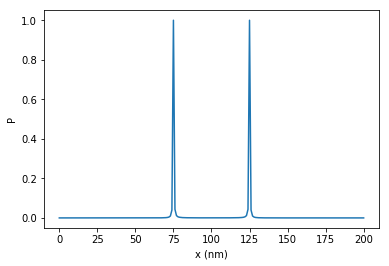

In [159]:
plt.plot(P[100,:])
plt.xlabel("x (nm)")
plt.ylabel("P")

In [149]:
P[125,100]

0.051016746909080646